## References
- __[Leetcode: Top Interview 150](https://leetcode.com/studyplan/top-interview-150/)__
- __[Github: mdmzfzl](https://github.com/mdmzfzl/NeetCode-Solutions?tab=readme-ov-file)__
- __[Github: shrenik-jain](https://github.com/shrenik-jain/neetcode-solutions/tree/main)__

## Contains Duplicate
Question: 
> Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct. <br>

Example:
> Input: nums = [1,2,3,1] <br>
> Output: true <br>
> Explanation: The element 1 occurs at the indices 0 and 3.

Key Idea:
> To check if there are any duplicates in the given list, we can use a hash set (set in Python) to store the unique elements as we traverse the list. <br>
> For each element, we check if it is already present in the set. If it is, then we have found a duplicate, and we return True. <br>
> If we traverse the entire list without finding any duplicates, we return False. <br>

In [20]:
from typing import List

class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        hashset = set()
        for n in nums:
            if n in hashset:
                return True
            hashset.add(n)
        return False

In [37]:
solution = Solution()

# Test Case 1: List with duplicates
nums1 = [1, 2, 3, 1]
print(solution.containsDuplicate(nums1))  # Output: True

# Test Case 2: List without duplicates
nums2 = [1, 2, 3, 4]
print(solution.containsDuplicate(nums2))  # Output: False

# Test Case 3: Empty list
nums3 = []
print(solution.containsDuplicate(nums3))  # Output: False

True
False
False


### Note
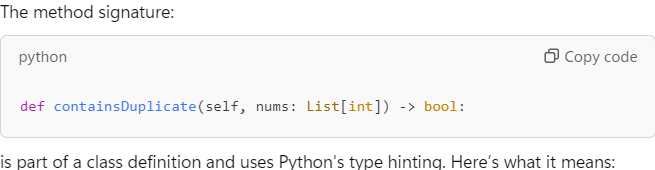
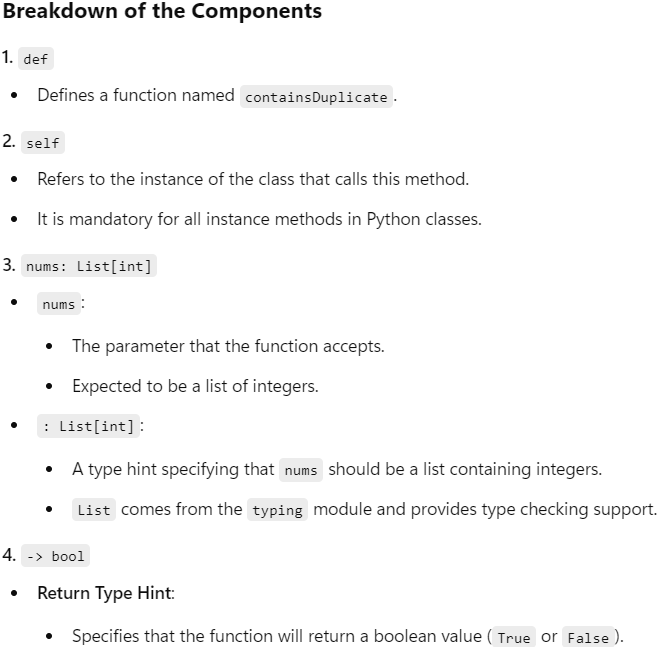
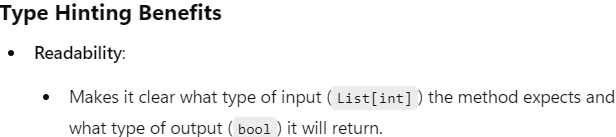

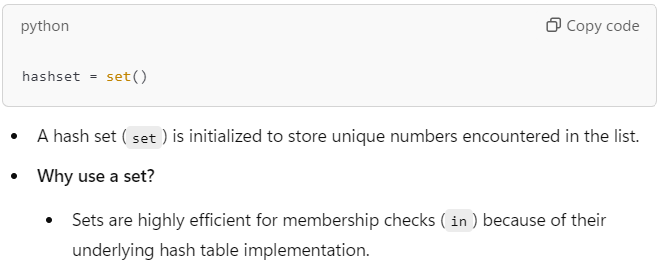

## Valid Anagram
Question: 
> Given two strings s and t, return true if t is an anagram of s, and false otherwise. <br>

Example:
> Input: s = "anagram", t = "nagaram" <br>
> Output: true <br>

Key Idea #1:
> Sort the strings and compare them <br>

Key Idea #2:
> Using Counter modules, count character frequencies in both strings and compare <br>

In [58]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        return sorted(s) == sorted(t)
    
    def isAnagram2(self, s: str, t: str) -> bool:
        # Check if lengths are different; if so, they cannot be anagrams
        if len(s) != len(t):
            return False
    
        # Count character frequencies in both strings and compare
        from collections import Counter
        return Counter(s) == Counter(t)        

In [60]:
solution = Solution()

# Example: Idea #1
print(solution.isAnagram("listen", "silent"))  # Output: True
print(solution.isAnagram("hello", "world"))    # Output: False

# Example: Idea #2
print(solution.isAnagram2("listen", "silent"))  # Output: True
print(solution.isAnagram2("hello", "world"))    # Output: False

True
False
True
False


### Note
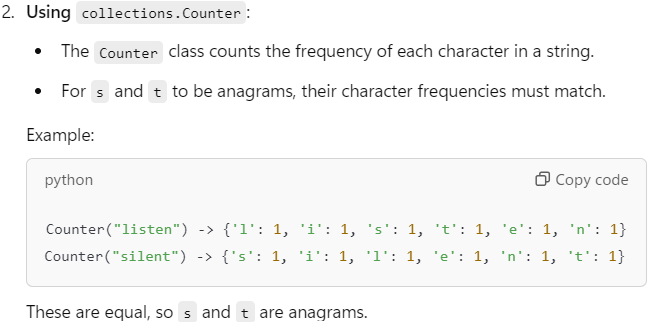

## Two Sum
Question: 
> Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target. <br>
> You may assume that each input would have exactly one solution, and you may not use the same element twice. <br>
> You can return the answer in any order. <br>

Example:
> Input: nums = [2,7,11,15], target = 9 <br>
> Output: [0,1] <br>
> Explaination: Because nums[0] + nums[1] == 9, we return [0, 1]. <br>

Key Idea:
> The key idea to solve this problem efficiently is by using a hash map (dictionary in Python) to keep track of the elements we have traversed so far. <br>
> For each element in the input list, we calculate the difference between the target and the current element. <br>
> If this difference exists in the hash map, then we have found the pair that sums to the target, and we return their indices. <br>
> Otherwise, we add the current element to the hash map and continue with the next element. <br>

In [70]:
class Solution:
    def twoSum(self, nums: list[int], target: int) -> list[int]:
        # Create a dictionary to store value-to-index mapping
        hash_map = {}
    
        # Iterate through the array
        for i, num in enumerate(nums):
            # Calculate the difference
            complement = target - num
    
            # Check if the difference exist in the hash table
            if complement in hash_map:
                return [hash_map[complement], i]
    
            # Store the current number with its index in the hash table
            hash_map[num] = i
    
        # If no solution is found (although the problem guarantees one)
        return []

# Example Usage
solution = Solution()

nums   = [2, 7, 11, 15]
target = 9
print(solution.twoSum(nums, target))

nums   = [3,2,4]
target = 6
print(solution.twoSum(nums, target))

nums   = [3,3]
target = 6
print(solution.twoSum(nums, target))

[0, 1]
[1, 2]
[0, 1]


### Note
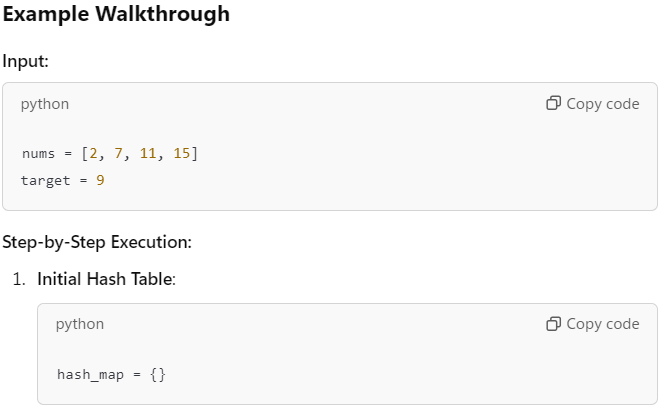
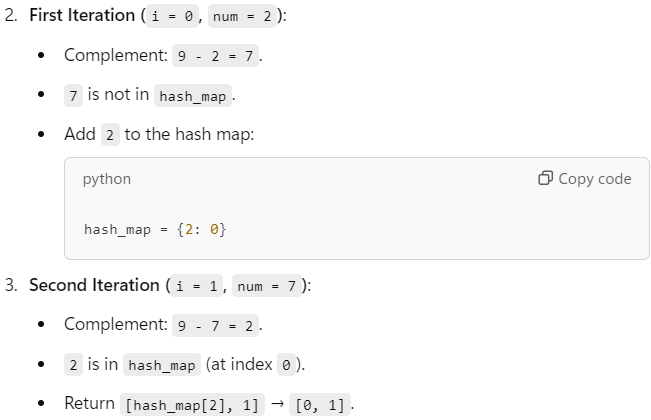


## Group Anagram
Question: 
> Given an array of strings strs, group the anagrams together. You can return the answer in any order. <br>

Example:
> Input: strs = ["eat","tea","tan","ate","nat","bat"] <br>
> Output: [["bat"],["nat","tan"],["ate","eat","tea"]] <br>
> Explanation:<br>
> - There is no string in strs that can be rearranged to form "bat".<br>
> - The strings "nat" and "tan" are anagrams as they can be rearranged to form each other.<br>
> - The strings "ate", "eat", and "tea" are anagrams as they can be rearranged to form each other.<br>

Key Idea:
> To group anagrams together, we can use a hash map (dictionary in Python) where the key is a sorted version of each word, and the value is a list of words that are anagrams of each other. <br>
> By iterating through the list of words, we can group them into the hash map based on their sorted versions.<br>

In [137]:
from collections import defaultdict

class Solution:
    # Using Sorted Strings as Keys
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        # key:value -> sorted word:word itself
        anagrams_map = {}

        for word in strs:
            sorted_word = "".join(sorted(word))
            if sorted_word in anagrams_map:
                anagrams_map[sorted_word].append(word)
            else:
                anagrams_map[sorted_word] = [word]

        return list(anagrams_map.values())
    
    # Character Frequency as Keys // {}
    def groupAnagrams2(self, strs: list[str]) -> list[list[str]]:
        # Create a hash map to store groups
        anagrams = {}
    
        for s in strs:
            # Create a frequency count for the string
            count = [0] * 26  # For 26 lowercase English letters
            for char in s:
                count[ord(char) - ord('a')] += 1
    
            # Use the tuple of counts as the key
            key = tuple(count)

            if key in anagrams:
                anagrams[key].append(s)
            else:
                anagrams[key] = [s]
    
        # Return the grouped anagrams
        return list(anagrams.values())

    # Character Frequency as Keys // defaultdict
    def groupAnagrams3(self, strs: list[str]) -> list[list[str]]:
        # Create a hash map to store groups
        anagrams = defaultdict(list)
    
        for s in strs:
            # Create a frequency count for the string
            count = [0] * 26  # For 26 lowercase English letters
            for char in s:
                count[ord(char) - ord('a')] += 1
    
            # Use the tuple of counts as the key
            key = tuple(count)
            anagrams[key].append(s)
    
        # Return the grouped anagrams
        return list(anagrams.values())

# Example Usage
solution = Solution()

strs = ["eat", "tea", "tan", "ate", "nat", "bat"]
print(solution.groupAnagrams(strs))
print(solution.groupAnagrams2(strs))
print(solution.groupAnagrams3(strs))

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]
[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]
[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


In [135]:
# Not a valid key for dictionary
sorted_word = sorted("eat")  
print('--- Not a valid key for dictionary ---')
print(type(sorted_word))

print(type([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

# A valid key for dictionary
print('--- A valid key for dictionary ---')
sorted_word = "".join(sorted("eat")) 
print(type(sorted_word))

sorted_word = tuple(sorted("eat"))
print(type(sorted_word))

print(type((1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0)))

--- Not a valid key for dictionary ---
<class 'list'>
<class 'list'>
--- A valid key for dictionary ---
<class 'str'>
<class 'tuple'>
<class 'tuple'>


### Note
 <br>
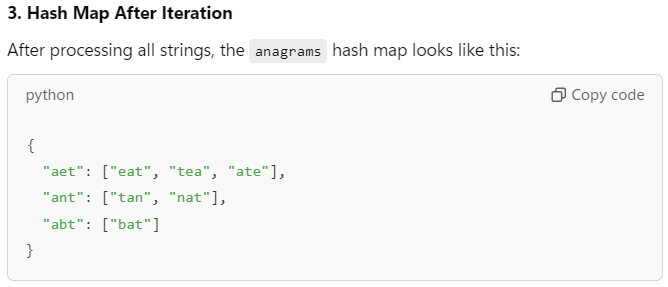
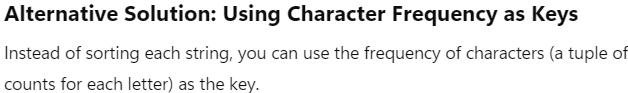 <br>
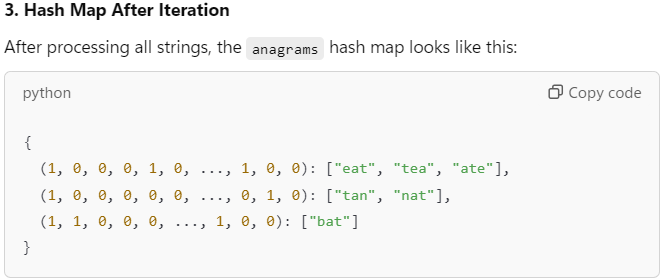
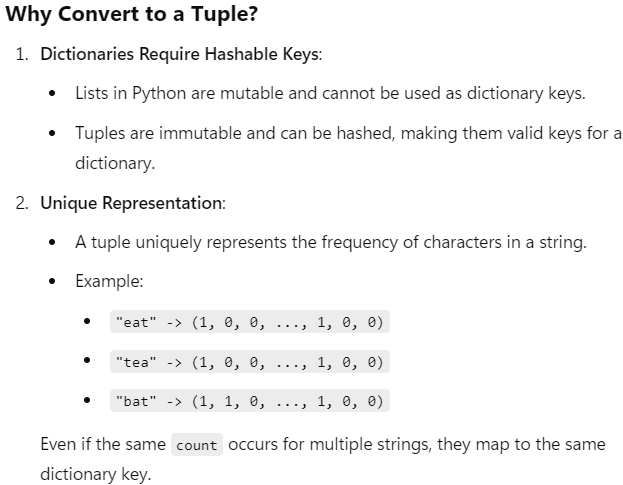
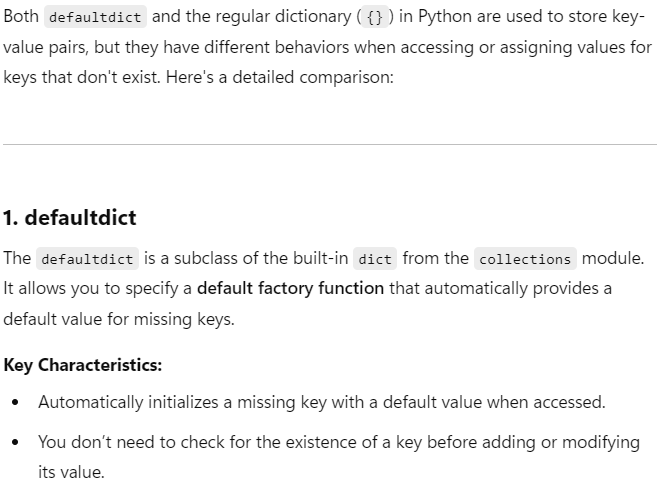
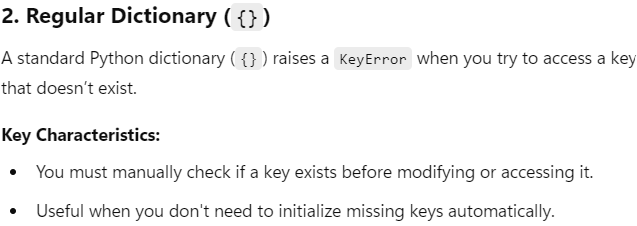

## Top K Frequent Elements
Question: 
> Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order. <br>

Example:
> Input: nums = [1,1,1,2,2,3], k = 2 <br>
> Output: [1,2]<br>

Key Idea:
> Use a heap to extract the k most frequent elements <br>

In [ ]:
from collections import Counter
import heapq

def topKFrequent(nums, k):
    # Count the frequency of each element
    count = Counter(nums)
    
    # Use a heap to extract the k most frequent elements
    # `heapq.nlargest` helps retrieve the k largest elements based on frequency
    return [key for key, _ in heapq.nlargest(k, count.items(), key=lambda x: x[1])]

# Example usage
nums = [1, 1, 1, 2, 2, 3]
k = 2
print(topKFrequent(nums, k))  # Output: [1, 2]


In [28]:
from collections import Counter
import heapq

nums = [1, 1, 1, 2, 2, 3]
k = 2

count = Counter(nums)
top_k = heapq.nlargest(k, count.items(), key=lambda x: x[1])

print(count)
print('------')
print(count.items())
print('------')
print(top_k)
print('------')
print([key for key, _ in top_k])
print('------')
print([f for _, f in top_k])


frequency_map = {}
for num in nums:
    frequency_map[num] = frequency_map.get(num, 0) + 1
print('------')
print(frequency_map)

Counter({1: 3, 2: 2, 3: 1})
------
dict_items([(1, 3), (2, 2), (3, 1)])
------
[(1, 3), (2, 2)]
------
[1, 2]
------
[3, 2]
------
{1: 3, 2: 2, 3: 1}


3

### Note
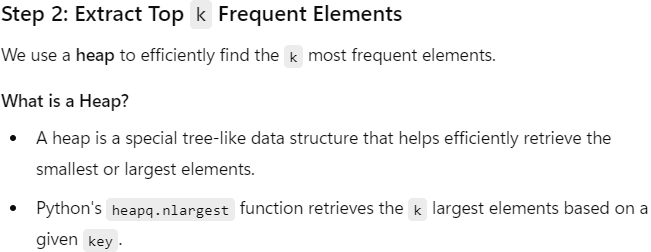

https://docs.python.org/3/library/heapq.html
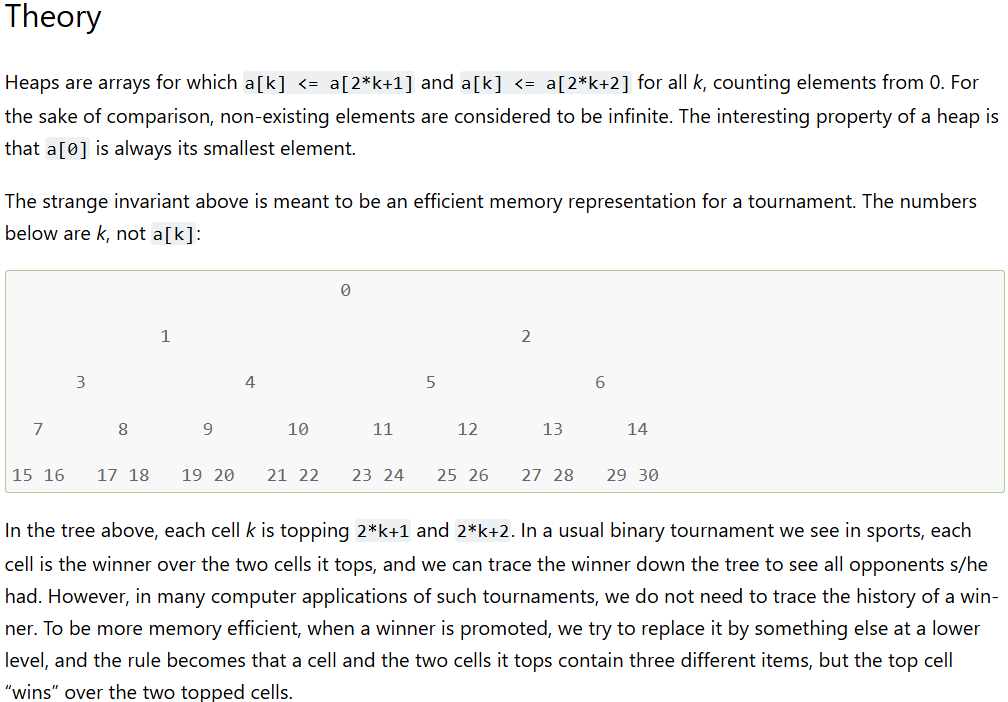
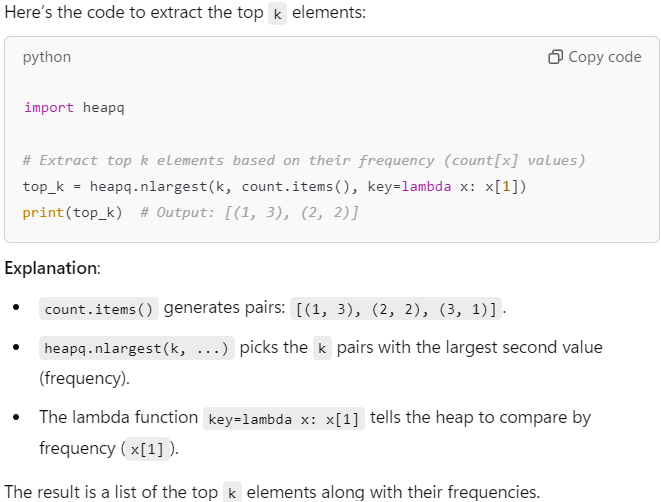

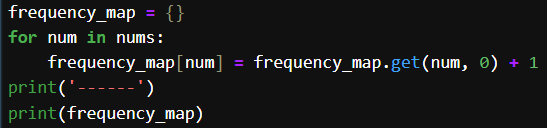
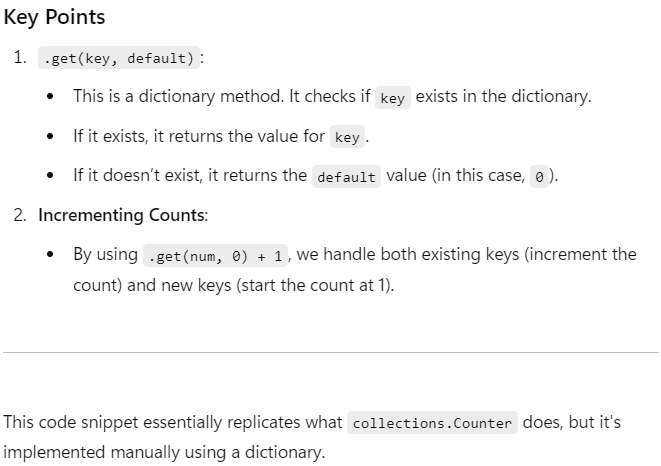

## Product of Array Except Self
Question: 
> Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i]. <br>

Example:
> Input: nums = [1,2,3,4] <br>
> Output: [24,12,8,6]<br>

Key Idea:
> To solve this problem, we can first calculate the product of all elements to the left of each index and store it in a list. <br>
> Then, we calculate the product of all elements to the right of each index and update the result list accordingly by multiplying it with <br>
> the previously calculated left product. In this way, each element in the result list will contain the product of all elements except the one at that index. <br>

In [39]:
def productExceptSelf(nums):
    n = len(nums)
    answer = [1] * n  # Initialize the output array with 1

    # Step 1: Calculate left products
    left_product = 1
    for i in range(n):
        answer[i] = left_product
        left_product *= nums[i]

    # Step 2: Calculate right products and combine with left products
    right_product = 1
    for i in range(n - 1, -1, -1):
        answer[i] *= right_product
        right_product *= nums[i]

    return answer

# Example Usage
nums = [1, 2, 3, 4]
print(productExceptSelf(nums))  # Output: [24, 12, 8, 6]


[24, 12, 8, 6]


In [43]:
nums = [1, 2, 3, 4, 5]
n = len(nums)

# Reverse loop
for i in range(n - 1, -1, -1):
    print(f"Index: {i}, Value: {nums[i]}")

Index: 4, Value: 5
Index: 3, Value: 4
Index: 2, Value: 3
Index: 1, Value: 2
Index: 0, Value: 1


### Note
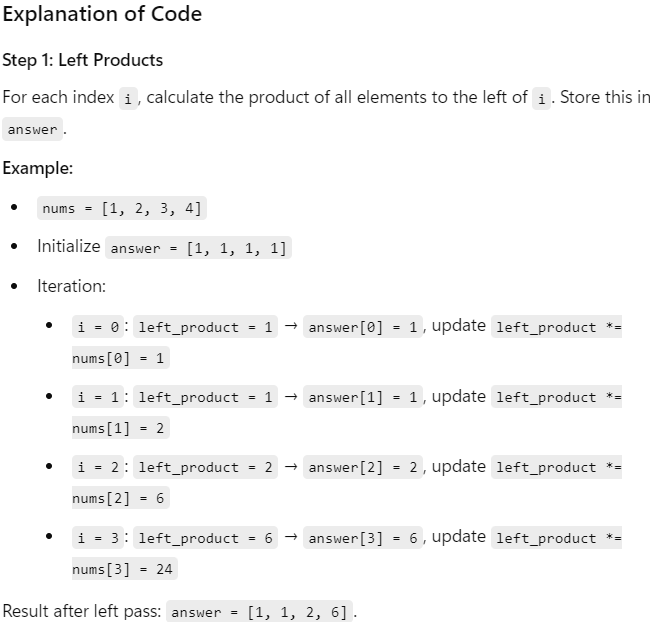
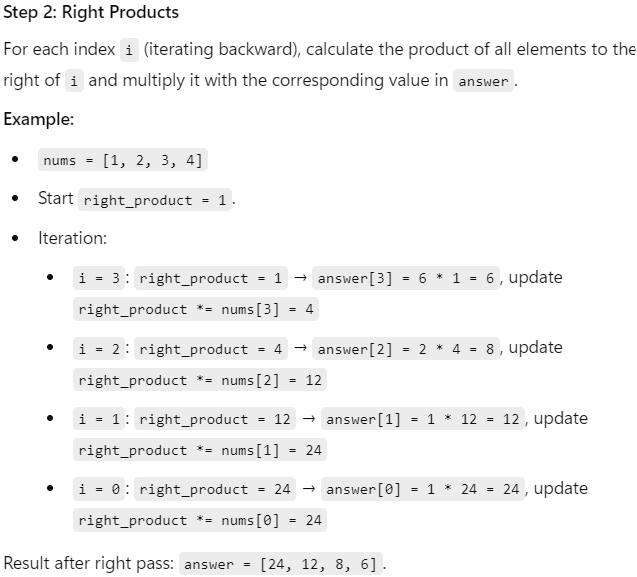
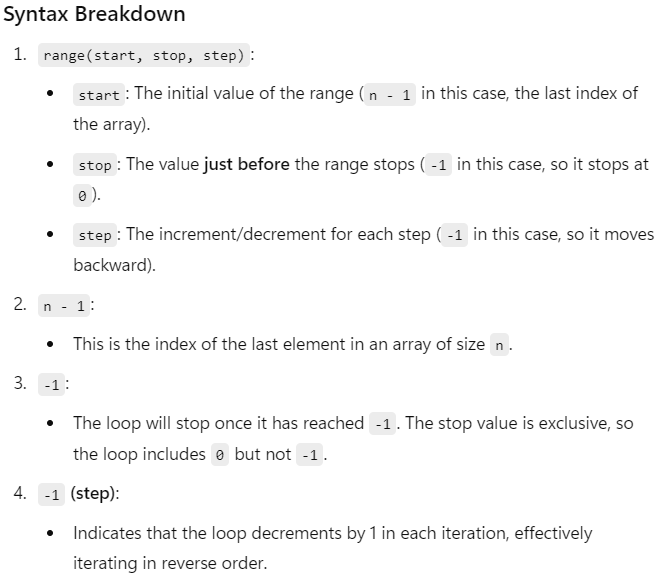

## Valid Sudoku
Question: 
> Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules: <br>
> Each row must contain the digits 1-9 without repetition.<br>
> Each column must contain the digits 1-9 without repetition.<br>
> Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition. <br>

Example:
> Input: board = <br>
[["8","3",".",".","7",".",".",".","."]<br>
,["6",".",".","1","9","5",".",".","."]<br>
,[".","9","8",".",".",".",".","6","."]<br>
,["8",".",".",".","6",".",".",".","3"]<br>
,["4",".",".","8",".","3",".",".","1"]<br>
,["7",".",".",".","2",".",".",".","6"]<br>
,[".","6",".",".",".",".","2","8","."]<br>
,[".",".",".","4","1","9",".",".","5"]<br>
,[".",".",".",".","8",".",".","7","9"]]<br>
> Output: false <br>
> Explanation: Same as Example 1, except with the 5 in the top left corner being modified to 8. Since there are two 8's in the top left 3x3 sub-box, it is invalid.<br>

Key Idea:
> We can validate the board by checking:<br>
> - Each row.<br>
> - Each column.<br>
> - Each 3x3 sub-grid.<br>
> We use a hash set to track whether a digit has already been seen for each row, column, or sub-grid.<br>

In [101]:
def isValidSudoku(board):
    # Initialize data structures to track rows, columns, and 3x3 sub-grids
    rows = [set() for _ in range(9)]
    cols = [set() for _ in range(9)]
    boxes = [set() for _ in range(9)]  # 3x3 sub-grids

    for i in range(9):  # Iterate through rows
        for j in range(9):  # Iterate through columns
            num = board[i][j]
            if num == '.':  # Skip empty cells
                continue

            # Check row
            if num in rows[i]:
                return False
            rows[i].add(num)

            # Check column
            if num in cols[j]:
                return False
            cols[j].add(num)

            # Check 3x3 sub-grid (box index = (i // 3) * 3 + (j // 3))
            box_index = (i // 3) * 3 + (j // 3)
            if num in boxes[box_index]:
                return False
            boxes[box_index].add(num)

    return True

# Example Usage
board = [
    ["5", "3", ".", ".", "7", ".", ".", ".", "."],
    ["6", ".", ".", "1", "9", "5", ".", ".", "."],
    [".", "9", "8", ".", ".", ".", ".", "6", "."],
    ["8", ".", ".", ".", "6", ".", ".", ".", "3"],
    ["4", ".", ".", "8", ".", "3", ".", ".", "1"],
    ["7", ".", ".", ".", "2", ".", ".", ".", "6"],
    [".", "6", ".", ".", ".", ".", "2", "8", "."],
    [".", ".", ".", "4", "1", "9", ".", ".", "5"],
    [".", ".", ".", ".", "8", ".", ".", "7", "9"]
]

board = [
    ["8", "3", ".", ".", "7", ".", ".", ".", "."], # At [0][0], 5 is replaced with 8. Now, there's two 8's in box 0. 
    ["6", ".", ".", "1", "9", "5", ".", ".", "."],
    [".", "9", "8", ".", ".", ".", ".", "6", "."],
    ["8", ".", ".", ".", "6", ".", ".", ".", "3"],
    ["4", ".", ".", "8", ".", "3", ".", ".", "1"],
    ["7", ".", ".", ".", "2", ".", ".", ".", "6"],
    [".", "6", ".", ".", ".", ".", "2", "8", "."],
    [".", ".", ".", "4", "1", "9", ".", ".", "5"],
    [".", ".", ".", ".", "8", ".", ".", "7", "9"]
]

print(isValidSudoku(board))   # Output: True
print(isValidSudoku(board2))  # Output: False

True
False


In [95]:
board = [
    ["5", "3", ".", ".", "7", ".", ".", ".", "."],
    ["6", ".", ".", "1", "9", "5", ".", ".", "."],
    [".", "9", "8", ".", ".", ".", ".", "6", "."],
    ["8", ".", ".", ".", "6", ".", ".", ".", "3"],
    ["4", ".", ".", "8", ".", "3", ".", ".", "1"],
    ["7", ".", ".", ".", "2", ".", ".", ".", "6"],
    [".", "6", ".", ".", ".", ".", "2", "8", "."],
    [".", ".", ".", "4", "1", "9", ".", ".", "5"],
    [".", ".", ".", ".", "8", ".", ".", "7", "9"]
]

for i in range(9):  # Iterate through rows
    for j in range(9):  # Iterate through columns
        num = board[i][j]
        if num == '.':  # Skip empty cells
            continue
            
        # Check 3x3 sub-grid (box index = (i // 3) * 3 + (j // 3))
        box_index = (i // 3) * 3 + (j // 3)
        print(f"Index: {i}{j}, Value: {board[i][j]}, Box: {box_index}")

Index: 00, Value: 5, Box: 0
Index: 01, Value: 3, Box: 0
Index: 04, Value: 7, Box: 1
Index: 10, Value: 6, Box: 0
Index: 13, Value: 1, Box: 1
Index: 14, Value: 9, Box: 1
Index: 15, Value: 5, Box: 1
Index: 21, Value: 9, Box: 0
Index: 22, Value: 8, Box: 0
Index: 27, Value: 6, Box: 2
Index: 30, Value: 8, Box: 3
Index: 34, Value: 6, Box: 4
Index: 38, Value: 3, Box: 5
Index: 40, Value: 4, Box: 3
Index: 43, Value: 8, Box: 4
Index: 45, Value: 3, Box: 4
Index: 48, Value: 1, Box: 5
Index: 50, Value: 7, Box: 3
Index: 54, Value: 2, Box: 4
Index: 58, Value: 6, Box: 5
Index: 61, Value: 6, Box: 6
Index: 66, Value: 2, Box: 8
Index: 67, Value: 8, Box: 8
Index: 73, Value: 4, Box: 7
Index: 74, Value: 1, Box: 7
Index: 75, Value: 9, Box: 7
Index: 78, Value: 5, Box: 8
Index: 84, Value: 8, Box: 7
Index: 87, Value: 7, Box: 8
Index: 88, Value: 9, Box: 8


### Note
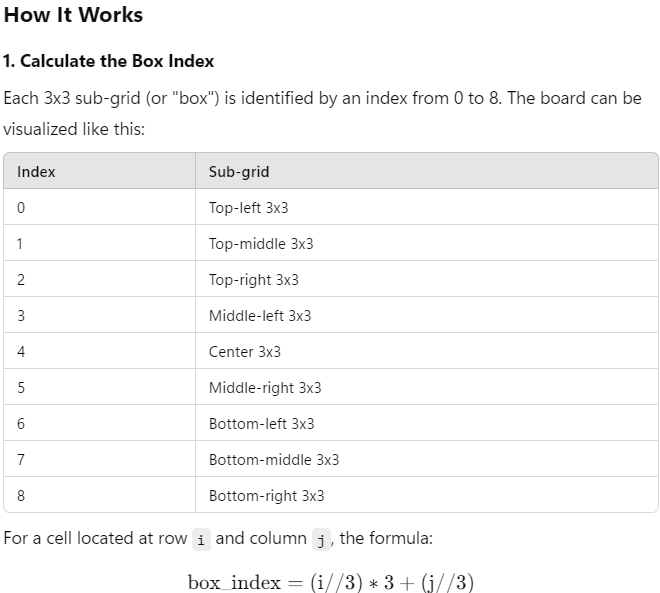
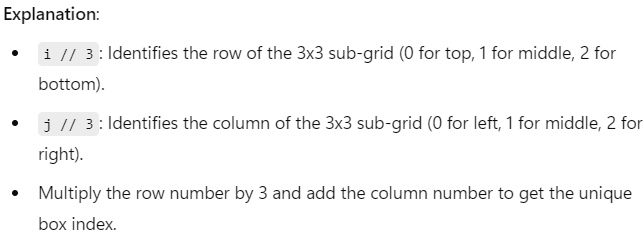
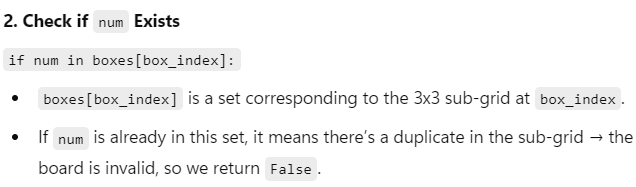
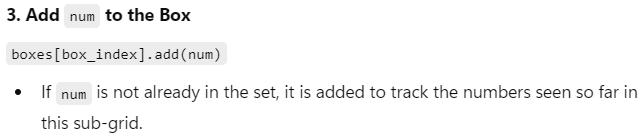

## Encode and Decode Strings
Problem Statement:
> Encoding: Convert a list of strings into a single string so that it can be transmitted or stored efficiently. <br>
> Decoding: Convert the encoded string back into the original list of strings.<br>

Example:
> Input: ["hello", "world", "leet", "code"] <br>
> Output: Encoded string = "5#hello5#world4#leet4#code" <br>
> Output: Decoded string = ["hello", "world", "leet", "code"] <br>

Key Idea:
> To handle arbitrary strings, we can use a length-prefix encoding scheme:<br>
> Encode:<br>
> - For each string, prepend its length and a delimiter (e.g., "#").<br>
> - Example: "hello" becomes "5#hello".<br>
> - Encode the entire list as a single string by concatenating these parts.<br>

> Decode:<br>
> - Parse the encoded string by first reading the length prefix, then extracting the corresponding substring.<br>

> This ensures the encoding/decoding process is unambiguous and works for all string inputs.<br>

In [173]:
class Codec:
    def encode(self, strs):
        """Encodes a list of strings to a single string."""
        encoded = ""
        for s in strs:
            # Prepend the length of the string and a delimiter
            encoded += str(len(s)) + "#" + s
        return encoded

    def decode(self, s):
        """Decodes a single string to a list of strings."""
        decoded = []
        i = 0
        while i < len(s):
            # Find the position of the delimiter
            j = s.find("#", i)
            # Extract the length prefix
            length = int(s[i:j])
            # Extract the string of that length
            decoded.append(s[j + 1 : j + 1 + length])
            # Move the pointer forward
            i = j + 1 + length
        return decoded

# Example usage
codec = Codec()
original_strings = [["hello", "world", "leet", "code"],
                    ["hello", "world", "#special#", "  space  ", "", "multi\nline", "end#"]]

for i in range(len(original_strings)):
    encoded = codec.encode(original_strings[i])
    print("Encoded:", encoded)
    
    decoded = codec.decode(encoded)
    print("Decoded:", decoded)
    print("")

Encoded: 5#hello5#world4#leet4#code
Decoded: ['hello', 'world', 'leet', 'code']

Encoded: 5#hello5#world9##special#9#  space  0#10#multi
line4#end#
Decoded: ['hello', 'world', '#special#', '  space  ', '', 'multi\nline', 'end#']



In [164]:
strs = ["hello", "world", "leet", "code"]
print(f"""strings: {strs}
""")

print("""Encodes the list of strings to a single string.""")
encoded = ""
for s in strs:
    # Prepend the length of the string and a delimiter
    encoded += str(len(s)) + "#" + s
    print(f"Word: {s}, Word Length: {len(s)}, Encoded word: {encoded}")

print(f"""
Decodes the single string to a list of strings.""")
s = encoded
decoded = []
i = 0
while i < len(s):
    # Find the position of the delimiter
    j = s.find("#", i)
    k = i # proxy i for print below
    # Extract the length prefix
    length = int(s[i:j])
    # Extract the string of that length
    decoded.append(s[j + 1 : j + 1 + length])
    # Move the pointer forward
    i = j + 1 + length
    print(f"Current i: {k}, Delimiter position: {j}, Word Length: {length}, Decoded string: {decoded}, Next i: {i}")

strings: ['hello', 'world', 'leet', 'code']

Encodes the list of strings to a single string.
Word: hello, Word Length: 5, Encoded word: 5#hello
Word: world, Word Length: 5, Encoded word: 5#hello5#world
Word: leet, Word Length: 4, Encoded word: 5#hello5#world4#leet
Word: code, Word Length: 4, Encoded word: 5#hello5#world4#leet4#code

Decodes the single string to a list of strings.
Current i: 0, Delimiter position: 1, Word Length: 5, Decoded string: ['hello'], Next i: 7
Current i: 7, Delimiter position: 8, Word Length: 5, Decoded string: ['hello', 'world'], Next i: 14
Current i: 14, Delimiter position: 15, Word Length: 4, Decoded string: ['hello', 'world', 'leet'], Next i: 20
Current i: 20, Delimiter position: 21, Word Length: 4, Decoded string: ['hello', 'world', 'leet', 'code'], Next i: 26


### Note
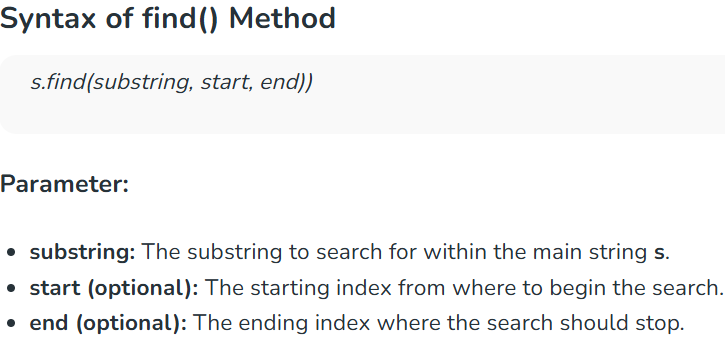

## Longest Consecutive Sequence
Question: 
> Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence. <br>

Example:
> Input: nums = [100,4,200,1,3,2] <br>
> Output: 4 <br>
> Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4. <br>

Key Idea:
>  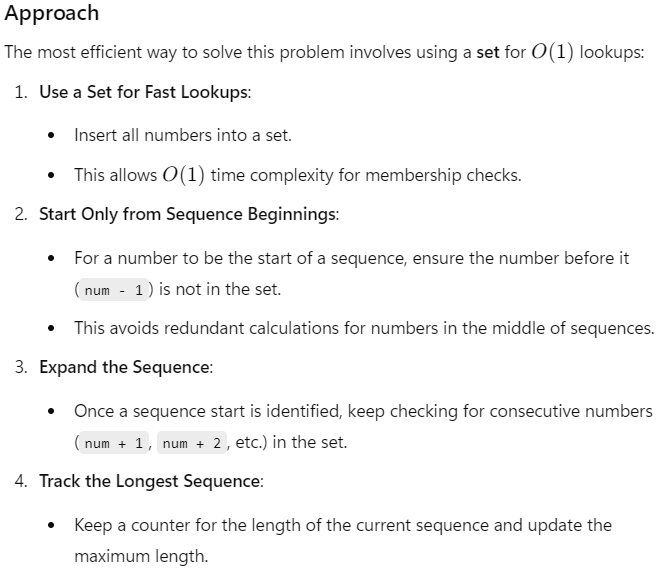

In [233]:
def longestConsecutive(nums):
    if not nums:
        return 0

    num_set = set(nums)  # Store all numbers in a set
    longest_streak = 0

    for num in num_set:
        # Only start a sequence if `num - 1` is not in the set
        if num - 1 not in num_set:
            current_num = num
            current_streak = 1

            # Check for the next numbers in the sequence
            while current_num + 1 in num_set:
                current_num += 1
                current_streak += 1

            # Update the longest streak
            longest_streak = max(longest_streak, current_streak)

    return longest_streak

# Example Usage
nums = [[100, 4, 200, 1, 3, 2],
        [0,3,7,2,5,8,4,6,0,1]]
for i in range(len(nums)):
    print(longestConsecutive(nums[i]))  # Output: 4 & 9

4
9


In [230]:
nums = [100,4,200,1,3,2]
# nums = [0,3,7,2,5,8,4,6,0,1]

num_set = set(nums)  # Store all numbers in a set
print(f"num_set: {num_set}")
print(f"")
max_length = 0

for num in num_set:
    print(f"-----{num}----")
    if num - 1 not in num_set:
        current_num = num
        current_length = 1
        print(f"current_num: {current_num} // current_length: {current_length}")

        while current_num + 1 in num_set:
            current_num += 1
            current_length += 1
            print(f"current_num: {current_num} // current_length: {current_length}")

        max_length = max(max_length, current_length)
        print(f"max_length: {max_length}")
    print(f"")

num_set: {1, 2, 3, 100, 4, 200}

-----1----
current_num: 1 // current_length: 1
current_num: 2 // current_length: 2
current_num: 3 // current_length: 3
current_num: 4 // current_length: 4
max_length: 4

-----2----

-----3----

-----100----
current_num: 100 // current_length: 1
max_length: 4

-----4----

-----200----
current_num: 200 // current_length: 1
max_length: 4



## Title
Question: 
>  <br>

Example:
> Input: <br>
> Output: <br>

Key Idea:
>  <br>